## Loading Dataset

In [1]:
!wget https://raw.githubusercontent.com/Pooyaknon/Male_Figure_Skating_Olympic/refs/heads/main/Data/MenSingleSkating_scores_per_element.csv
!wget https://raw.githubusercontent.com/Pooyaknon/Male_Figure_Skating_Olympic/refs/heads/main/Data/MenSingleSkating_scores_per_skater.csv

--2025-05-11 10:03:45--  https://raw.githubusercontent.com/Pooyaknon/Male_Figure_Skating_Olympic/refs/heads/main/Data/MenSingleSkating_scores_per_element.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69627 (68K) [text/plain]
Saving to: ‘MenSingleSkating_scores_per_element.csv’

MenSingleSkating_sc 100%[===================>]  68.00K  --.-KB/s    in 0.02s   

2025-05-11 10:03:45 (3.26 MB/s) - ‘MenSingleSkating_scores_per_element.csv’ saved [69627/69627]

--2025-05-11 10:03:46--  https://raw.githubusercontent.com/Pooyaknon/Male_Figure_Skating_Olympic/refs/heads/main/Data/MenSingleSkating_scores_per_skater.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubus

Import libraries

In [24]:
import pandas as pd
import numpy as np

from plotnine import *

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier

Import Data

In [3]:
df_element = pd.read_csv('MenSingleSkating_scores_per_element.csv')
df_skater = pd.read_csv('MenSingleSkating_scores_per_skater.csv')

Checking Data

In [4]:
df_element.head(1000)

,Skater,Country,Year,Segment,Element_ID,Element_Name,Base_Value,GOE,Element_Score,Is_Jump,Is_Quad,Underrotated,Fall,Medal
0,Hanyu Yuzuru,JPN,2014,FS,1,4S,10.50,-3.00,7.50,True,True,False,True,Gold
1,Hanyu Yuzuru,JPN,2014,FS,2,4T,10.30,2.14,12.44,True,True,False,False,Gold
2,Hanyu Yuzuru,JPN,2014,FS,3,3F,5.30,-1.90,3.40,True,False,False,True,Gold
3,Hanyu Yuzuru,JPN,2014,FS,4,StSq3,3.30,1.00,4.30,False,False,False,False,Gold
4,Hanyu Yuzuru,JPN,2014,FS,5,FCCoSp4,3.50,1.00,4.50,False,False,False,False,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,Shmuratko Ivan,UKR,2022,FS,8,3Lze+1Eu+3S,10.47,-1.01,9.46,True,False,False,False,NaN
909,Shmuratko Ivan,UKR,2022,FS,9,2A,3.63,0.28,3.91,True,False,False,False,NaN
910,Shmuratko Ivan,UKR,2022,FS,10,FSSp4,3.00,0.34,3.34,False,False,False,False,NaN
911,Shmuratko Ivan,UKR,2022,FS,11,StSq2,2.60,0.41,3.01,False,False,False,False,NaN


In [5]:
df_skater.head(100)

,Skater,Country,Year,SP_Score,Total_Element_Score_FS,Total_FS_Score,Total_Score_Overall,Num_Jumps_FS,Num_Quad_Jumps_FS,Avg_Jump_Score,Avg_Element_Score,Medal
0,Hanyu Yuzuru,JPN,2014,101.45,89.66,178.64,280.09,8,2,12.31,10.77,Gold
1,Chan Patrick,CAN,2014,97.52,85.40,178.10,275.62,8,2,11.23,9.85,Silver
2,Ten Denis,KAZ,2014,84.06,88.90,171.04,255.10,8,1,10.34,9.45,Bronze
3,Fernandez Javier,ESP,2014,86.98,77.80,166.94,253.92,8,2,9.43,8.94,NaN
4,Machida Tatsuki,JPN,2014,83.48,88.22,169.94,253.42,8,2,10.77,9.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
67,Majorov Nikolaj,SWE,2022,78.54,67.60,142.24,220.78,7,0,8.89,8.45,NaN
68,Milyukov Konstantin,BLR,2022,78.49,71.35,143.73,222.22,7,1,8.97,8.92,NaN
69,Shmuratko Ivan,UKR,2022,78.11,57.17,127.65,205.76,7,0,7.15,7.15,NaN
70,Mozalev Andrei,ROC,2022,77.05,79.48,156.28,233.33,7,2,9.79,9.94,NaN


In [6]:
print(df_element.columns)
print(df_skater.columns)

Index(['Skater', 'Country', 'Year', 'Segment', 'Element_ID', 'Element_Name',
       'Base_Value', 'GOE', 'Element_Score', 'Is_Jump', 'Is_Quad',
       'Underrotated', 'Fall', 'Medal'],
      dtype='object')
Index(['Skater', 'Country', 'Year', 'SP_Score', 'Total_Element_Score_FS',
       'Total_FS_Score', 'Total_Score_Overall', 'Num_Jumps_FS',
       'Num_Quad_Jumps_FS', 'Avg_Jump_Score', 'Avg_Element_Score', 'Medal'],
      dtype='object')


## **คำถามเกี่ยวกับความสัมพันธ์**

Q1: คะแนน Jump element มีผลต่อคะแนนรวมไหม

Ans: จากกราฟจะเห็นได้ว่าถ้าทำคะแนน jump ได้สูง แนวโน้มคะแนนรวมจะสูงขึ้น

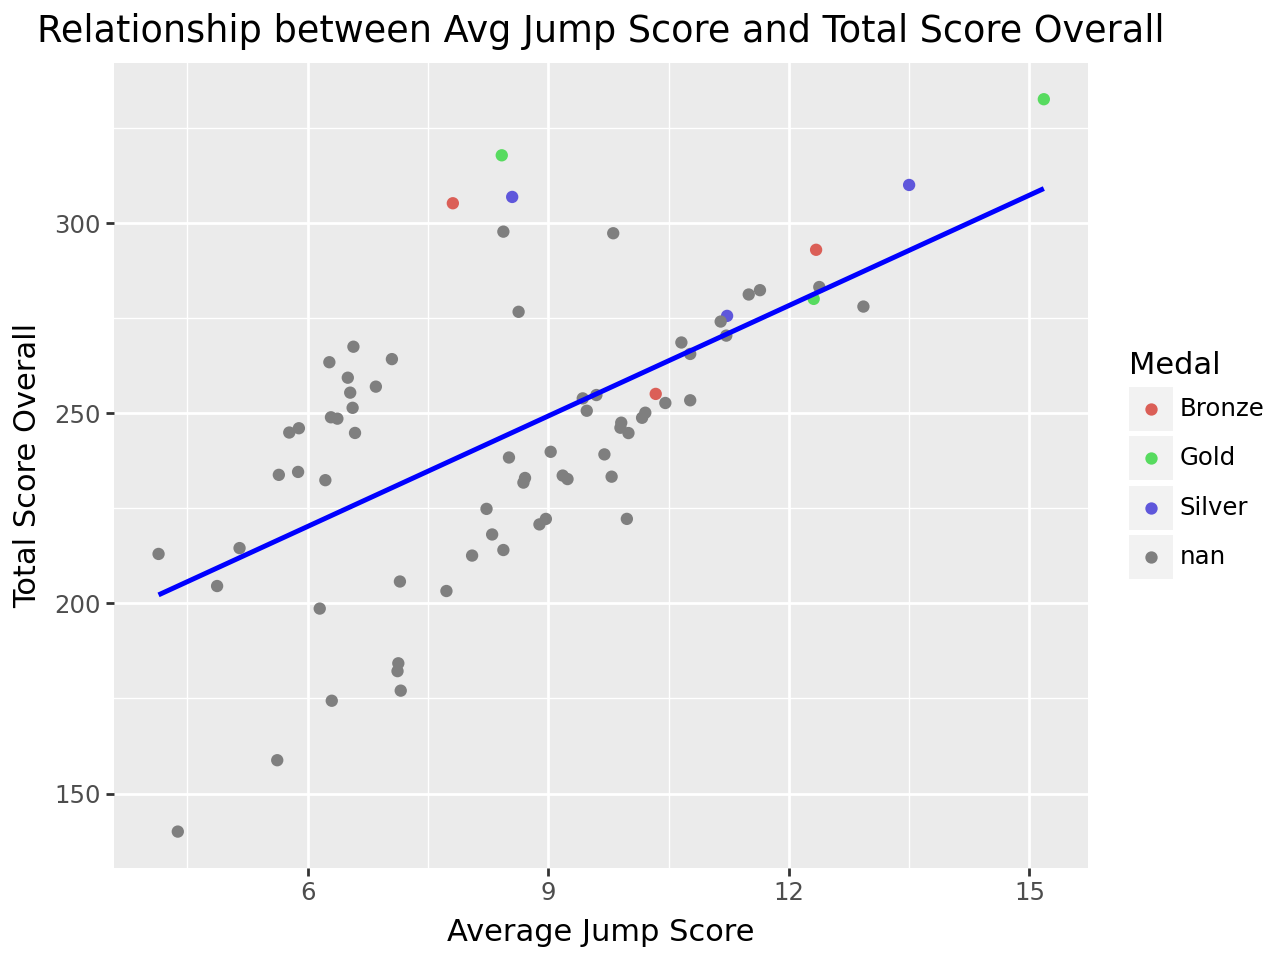

In [7]:
ggplot(df_skater, aes(x='Avg_Jump_Score', y='Total_Score_Overall')) + \
    geom_point(aes(color='Medal')) + \
    geom_smooth(method='lm', se=False, color='blue') + \
    labs(title='Relationship between Avg Jump Score and Total Score Overall',
         x='Average Jump Score',
         y='Total Score Overall')

ใช้ plotnine เพื่อสร้างกราฟแสดงความสัมพันธ์ระหว่างคะแนนการกระโดดเฉลี่ย (Avg_Jump_Score) กับคะแนนรวม (Total_Score_Overall) โดยแยกตามเหรียญรางวัลที่ได้รับ (Medal) และเพิ่มเส้นแนวโน้มเชิงเส้น (linear trend line) เพื่อดูแนวโน้มของข้อมูล

Q2: จำนวนการทำ Jump ยาก ๆ ประเภท Quad Jumps (การ jump ที่มีเลข 4 นำหน้า) มีความสัมพันธ์กับคะแนนอย่างไร

Ans: จากกราฟจะเห็นว่ายิ่งทำ Quad jump จำนวนครั้งมากขึ้น คะแนนรวมก็จะมีแนวโน้มมากขึ้นด้วย แต่เพราะเป็นท่ายาก หากทำได้ไม่ดีก็จะไม่ทำให้ได้คะแนนสูง

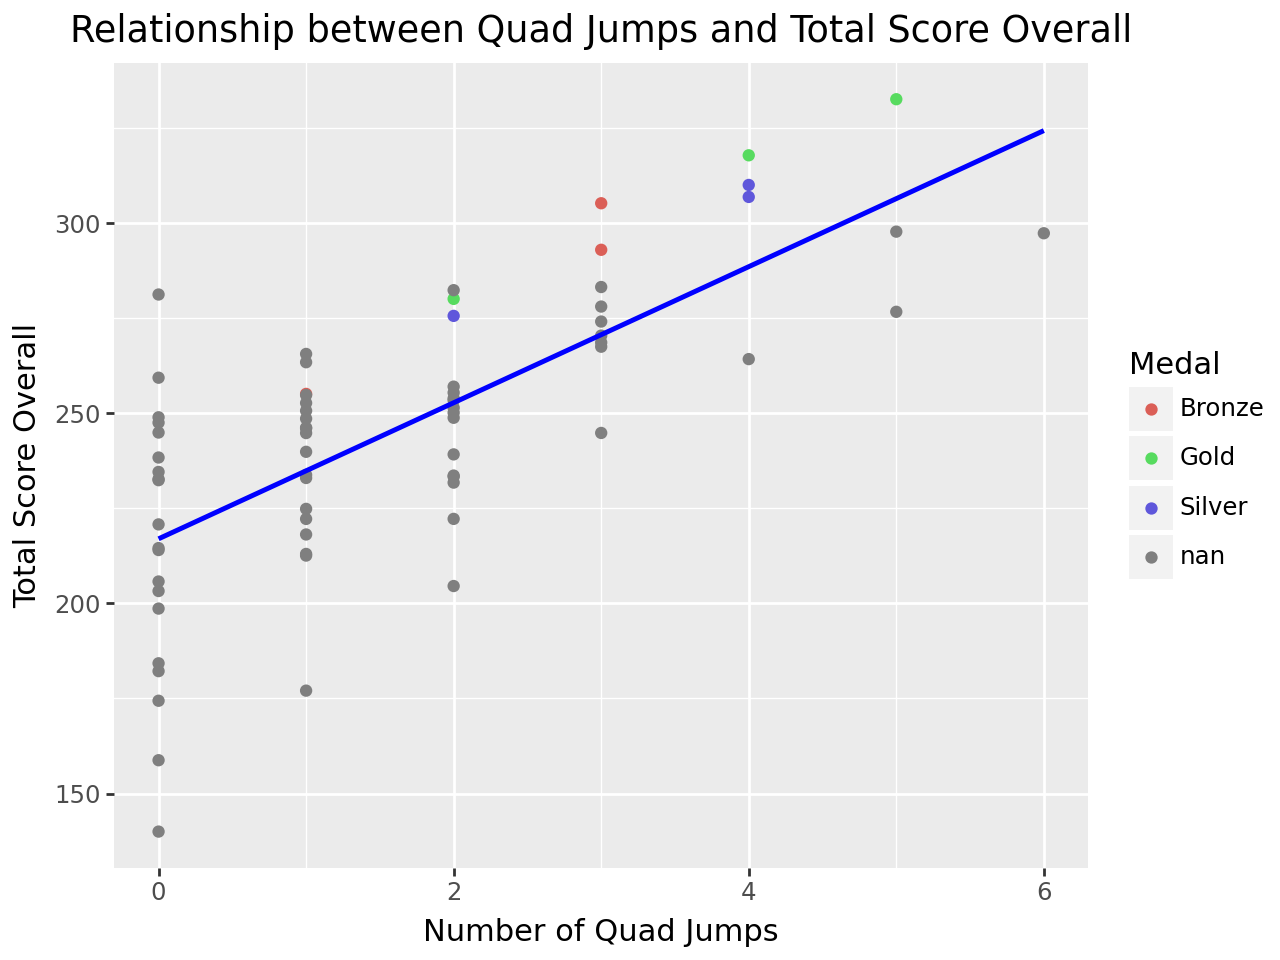

In [8]:
ggplot(df_skater, aes(x='Num_Quad_Jumps_FS', y='Total_Score_Overall')) + \
    geom_point(aes(color='Medal')) + \
    geom_smooth(method='lm', se=False, color='blue') + \
    labs(title='Relationship between Quad Jumps and Total Score Overall',
         x='Number of Quad Jumps',
         y='Total Score Overall')

ใช้ plotnine เพื่อสร้างกราฟแสดงความสัมพันธ์ระหว่างจำนวนการกระโดด Quad ใน Free Skating (Num_Quad_Jumps_FS) กับคะแนนรวม (Total_Score_Overall) โดยแยกตามเหรียญรางวัลที่ได้รับ (Medal) และเพิ่มเส้นแนวโน้มเชิงเส้น (linear trend line) เพื่อดูแนวโน้มของข้อมูล

## **คำถามเกี่ยวกับการทำนาย**

Q: ทำนายการได้เหรียญของนักสเกตลีลาชายจากคุณสมบัติของการกระโดดในรอบ Free Skating

1. เลือกเอาเฉพาะข้อมูลที่เป็นโปรแกรม Free Skating (FS) และ element ที่มีการ jump

In [9]:
# Filter jump elements from Free Skating
df_jump = df_element[
    (df_element['Segment'] == 'FS') &
    (df_element['Is_Jump'] == True)
].copy()

2. สร้าง feature เพิ่ม เพื่อใช้วัดความสำเร็จของการ jump ในแต่ละ element
- Total_Score: ผลรวมของค่าฐาน (Base_Value) และคะแนน GOE
- Score_Ratio: อัตราส่วนของคะแนนที่ได้รับ (Element_Score) ต่อค่าฐาน
- Success_Rate: อัตราความสำเร็จของการกระโดด โดยพิจารณาจากการล้ม (Fall) และการหมุนไม่ครบ (Underrotated)



In [10]:
# Enhanced Feature Engineering
df_jump['Total_Score'] = df_jump['Base_Value'] + df_jump['GOE']
df_jump['Score_Ratio'] = df_jump['Element_Score'] / (df_jump['Base_Value'] + 1e-6)
df_jump['Success_Rate'] = (~df_jump['Fall'].astype(bool)).astype(int) * (1 - df_jump['Underrotated'])

3. เพิ่มข้อมูลด้วยการสุ่ม (Data Augmentation)
เพิ่มข้อมูลโดยการสุ่มค่าต่าง ๆ เช่น Base_Value, GOE, และ Element_Score ด้วยการเพิ่ม noise และการสุ่มเปลี่ยนค่าของ boolean features เช่น Is_Quad และ Fall เนื่องจากจำนวนคนที่ได้เหรียญมีน้อยกว่าคนที่ไม่ได้เหรียญมากจนทำให้การทำนายอาจผิดเพี้ยนได้

In [11]:
# Data Augmentation
def augment_data(df, factor=2):
    augmented_dfs = [df.copy()]

    for _ in range(factor-1):
        augmented_df = df.copy()

        # Add Gaussian noise with different scales for different features
        augmented_df['Base_Value'] += np.random.normal(0, 0.03, len(df))
        augmented_df['GOE'] += np.random.normal(0, 0.05, len(df))
        augmented_df['Element_Score'] += np.random.normal(0, 0.04, len(df))

        # Flip boolean features with small probability
        flip_prob = 0.1

        augmented_df['Is_Quad'] = augmented_df['Is_Quad'].astype(bool)
        augmented_df['Is_Quad'] = augmented_df['Is_Quad'].mask(np.random.random(len(df)) < flip_prob,
                                                             ~augmented_df['Is_Quad'])

        augmented_df['Fall'] = augmented_df['Fall'].fillna(False).astype(bool)
        augmented_df['Fall'] = augmented_df['Fall'].mask(np.random.random(len(df)) < flip_prob,
                                                         ~augmented_df['Fall'])

        augmented_dfs.append(augmented_df)

    return pd.concat(augmented_dfs, ignore_index=True)

df_jump_augmented = augment_data(df_jump, factor=3)

4. เตรียมข้อมูลสำหรับการฝึกโมเดล
แยก numeric features และ boolean features ออกมาเพื่อใช้เป็นข้อมูลอินพุต (X) และกำหนดเป้าหมาย (y) เป็นเหรียญรางวัลที่ได้รับ โดยแทนค่าที่หายไปด้วย "No Medal"

In [12]:
# Advanced Preprocessing
numeric_features = ['Base_Value', 'GOE', 'Element_Score', 'Total_Score', 'Score_Ratio', 'Success_Rate']
boolean_features = ['Is_Quad', 'Underrotated', 'Fall']

X = df_jump_augmented[numeric_features + boolean_features]
y = df_jump_augmented["Medal"].fillna("No Medal")

5. จัดการกับปัญหาคลาสไม่สมดุลด้วย SMOTE
- เข้ารหัสค่าของ y ด้วย LabelEncoder
- แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ โดยรักษาสัดส่วนของแต่ละคลาส
- ใช้ SMOTE เพื่อเพิ่มข้อมูลในคลาสที่มีจำนวนน้อย เพื่อแก้ปัญหาคลาสไม่สมดุล โดย LabelEncoder ใช้ในการเข้ารหัส lebel ผลลัพธ์ (Medal) เป็นตัวเลข จากนั้นข้อมูลถูกแบ่งออกเป็น train set (X_train, y_train) และ test set (X_test, y_test)

In [13]:
# Handle Class Imbalance with SMOTE
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split before SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

6. เลือก feature ด้วย Random Forest
- สร้าง preprocessor เพื่อปรับสเกลของฟีเจอร์เชิงตัวเลข
- ใช้ SelectFromModel ร่วมกับ RandomForestClassifier เพื่อเลือก feature ที่สำคัญที่สุด

In [14]:
# Feature Selection
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_features)])

selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(preprocessor.fit_transform(X_train_res), y_train_res)

SelectFromModel(estimator=RandomForestClassifier(random_state=42))

7. สร้างและปรับแต่งโมเดล Random Forest
- สร้าง pipeline สำหรับโมเดล Random Forest และใช้ GridSearchCV เพื่อค้นหาค่า parameter ที่ดีที่สุดโดยใช้การ cross-validation

In [15]:
# Model Pipeline with Hyperparameter Tuning
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search_rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Base_Value',
                                                                          'GOE',
                                                                          'Element_Score',
                                                                          'Total_Score',
                                                                          'Score_Ratio',
                                                                          'Success_Rate'])])),
                                       ('selector',
                                        SelectFromModel(estimator=RandomForestClassifier(random_state=42))),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='f1_weighted')

8. สร้างและปรับแต่งโมเดล Gradient Boosting
- ใช้ GradientBoostingClassifier จาก sklearn ในการสร้างโมเดลที่ใช้ Gradient Boosting
- ใช้ GridSearchCV เพื่อลองหาค่า parameter ที่ดีที่สุด (n_estimators, learning_rate, max_depth) โดยทำการเทรนและเลือกค่าที่ให้ผลลัพธ์ดีที่สุดตาม f1_weighted (คะแนน F1 แบบถ่วงน้ำหนัก) จากการใช้ cross-validation

In [16]:
# Gradient Boosting Model
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

param_grid_gb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5]
}

grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search_gb.fit(X_train_res, y_train_res)

best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

9. Logistic Regression Model
- ใช้พารามิเตอร์ class_weight='balanced' ซึ่งช่วยในการปรับสมดุลข้อมูลที่ไม่สมดุล (เช่น การมีข้อมูลจำนวนมากที่ไม่มีเหรียญ) และ max_iter=1000 เพื่อให้จำนวนรอบในการเทรนสูงพอ
- ใช้ GridSearchCV เพื่อหาค่า parameter ที่ดีที่สุดสำหรับตัวแปร C (พารามิเตอร์ที่ควบคุมขนาดของการ Regularization)

In [17]:
# Logistic Regression Model
pipeline_logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000))
])

param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10]
}

grid_search_logreg = GridSearchCV(pipeline_logreg, param_grid_logreg, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search_logreg.fit(X_train_res, y_train_res)

best_logreg = grid_search_logreg.best_estimator_

10. LabelEncoder
- ใช้ LabelEncoder ในการแปลงค่าที่เป็นประเภท (เช่น 'Gold', 'Silver', 'No Medal') ไปเป็นตัวเลขที่โมเดลสามารถเข้าใจได้
- evaluate_model จะคำนวณความถูกต้อง (accuracy) และคะแนน F1 รวมทั้งแสดงรายงานการจำแนกประเภท (classification report) สำหรับแต่ละโมเดล
- evaluate_model เพื่อตรวจสอบผลลัพธ์จากโมเดลต่าง ๆ (Random Forest, Gradient Boosting, Logistic Regression, Ensemble) ด้วยข้อมูลทดสอบ (X_test, y_test)

In [18]:
# Fitting LabelEncoder on y_train
le = LabelEncoder()
le.fit(['Bronze', 'Silver', 'Gold', 'No Medal'])

def evaluate_model(model, X_test, y_test, le):
    y_pred = model.predict(X_test)

    y_test_labels = le.inverse_transform(y_test)
    y_pred_labels = le.inverse_transform(y_pred)

    acc = accuracy_score(y_test_labels, y_pred_labels)
    f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

    report = classification_report(y_test_labels, y_pred_labels, target_names=le.classes_)

    print(f"\nModel Accuracy: {acc:.3f}")
    print(f" Weighted F1 Score: {f1:.3f}")
    print("\nClassification Report:")
    print(report)

    return acc, f1

11. Ensemble of Best Models รวมโมเดลที่ดีที่สุด
- สร้าง VotingClassifier ซึ่งเป็นการรวมโมเดลจาก RandomForest, GradientBoosting และ LogisticRegression โดยใช้วิธีการ soft voting (การรวมคะแนนของแต่ละโมเดลเพื่อให้ได้คะแนนรวม) และปรับน้ำหนักของแต่ละโมเดล

In [19]:
# Ensemble of Best Models including Logistic Regression
logreg = LogisticRegression(random_state=42, class_weight='balanced')

ensemble_all = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('gb', best_gb),
        ('logreg', best_logreg)
    ],
    voting='soft',
    weights=[1, 1.5, 1]
)

ensemble_all.fit(X_train_res, y_train_res)

VotingClassifier(estimators=[('rf',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('num',
                                                                                StandardScaler(),
                                                                                ['Base_Value',
                                                                                 'GOE',
                                                                                 'Element_Score',
                                                                                 'Total_Score',
                                                                                 'Score_Ratio',
                                                                                 'Success_Rate'])])),
                                              ('selector',
                                               SelectFromModel(estimator=RandomForestClassifier(random_state=42))),
                                              ('classifier',
                                               RandomForestClassifier(class_weight='balanced',
                                                                      ra...
                                               ColumnTransformer(transformers=[('num',
                                                                                StandardScaler(),
                                                                                ['Base_Value',
                                                                                 'GOE',
                                                                                 'Element_Score',
                                                                                 'Total_Score',
                                                                                 'Score_Ratio',
                                                                                 'Success_Rate'])])),
                                              ('selector',
                                               SelectFromModel(estimator=RandomForestClassifier(random_state=42))),
                                              ('classifier',
                                               LogisticRegression(C=0.1,
                                                                  class_weight='balanced',
                                                                  max_iter=1000,
                                                                  random_state=42))]))],
                 voting='soft', weights=[1, 1.5, 1])

12. แสดงค่าความถูกต้อง (accuracy) และคะแนน F1 สำหรับแต่ละโมเดล

In [20]:
print("\n=== Random Forest ===")
rf_acc, rf_f1 = evaluate_model(grid_search_rf, X_test, y_test, le)

print("\n=== Gradient Boosting ===")
gb_acc, gb_f1 = evaluate_model(grid_search_gb, X_test, y_test, le)

print("\n=== Logistic Regression ===")
logreg_acc, logreg_f1 = evaluate_model(grid_search_logreg, X_test, y_test, le)

print("\n=== Ensemble  (RF + GB + LogReg) ===")
ensemble_acc, ensemble_f1 = evaluate_model(ensemble_all, X_test, y_test, le)


=== Random Forest ===

Model Accuracy: 0.880
 Weighted F1 Score: 0.886

Classification Report:
              precision    recall  f1-score   support

      Bronze       0.40      0.43      0.41        14
        Gold       0.50      0.57      0.53        14
    No Medal       0.96      0.92      0.94       290
      Silver       0.48      0.79      0.59        14

    accuracy                           0.88       332
   macro avg       0.58      0.68      0.62       332
weighted avg       0.90      0.88      0.89       332


=== Gradient Boosting ===

Model Accuracy: 0.873
 Weighted F1 Score: 0.881

Classification Report:
              precision    recall  f1-score   support

      Bronze       0.22      0.29      0.25        14
        Gold       0.53      0.64      0.58        14
    No Medal       0.96      0.92      0.94       290
      Silver       0.56      0.71      0.62        14

    accuracy                           0.87       332
   macro avg       0.57      0.64      0.60

13. Cross-validation Scores
- ใช้ cross_val_score เพื่อตรวจสอบคะแนน F1 ของโมเดลต่าง ๆ ผ่านการ cross-validation 5 รอบ

In [25]:
# cross-validation scores

# Random Forest
rf_cv_scores = cross_val_score(best_rf, X, y_encoded, cv=5, scoring='f1_weighted')
print("Random Forest CV Score: {:.3f} (+{:.3f} -{:.3f})".format(rf_cv_scores.mean(), rf_cv_scores.std(), rf_cv_scores.std()))

# Gradient Boosting
gb_cv_scores = cross_val_score(best_gb, X, y_encoded, cv=5, scoring='f1_weighted')
print("Gradient Boosting CV Score: {:.3f} (+{:.3f} -{:.3f})".format(gb_cv_scores.mean(), gb_cv_scores.std(), gb_cv_scores.std()))

# Logistic Regression
logreg_cv_scores = cross_val_score(best_logreg, X, y_encoded, cv=5, scoring='f1_weighted')
print("Logistic Regression CV Score: {:.3f} (+{:.3f} -{:.3f})".format(logreg_cv_scores.mean(), logreg_cv_scores.std(), logreg_cv_scores.std()))

# Ensemble
ensemble_cv_scores = cross_val_score(ensemble_all, X, y_encoded, cv=5, scoring='f1_weighted')
print("Ensemble CV Score: {:.3f} (+{:.3f} -{:.3f})".format(ensemble_cv_scores.mean(), ensemble_cv_scores.std(), ensemble_cv_scores.std()))

Random Forest CV Score: 0.973 (+0.010 -0.010)
Gradient Boosting CV Score: 0.970 (+0.002 -0.002)
Logistic Regression CV Score: 0.627 (+0.027 -0.027)
Ensemble CV Score: 0.970 (+0.003 -0.003)


## **Model Analysis**

**Comparison of Model Performance**

1. ผลลัพธ์ทั้งหมดจะถูกเก็บใน DataFrame จากนั้นแสดงผลในกราฟแท่งที่เปรียบเทียบผลลัพธ์จากโมเดลต่าง ๆ

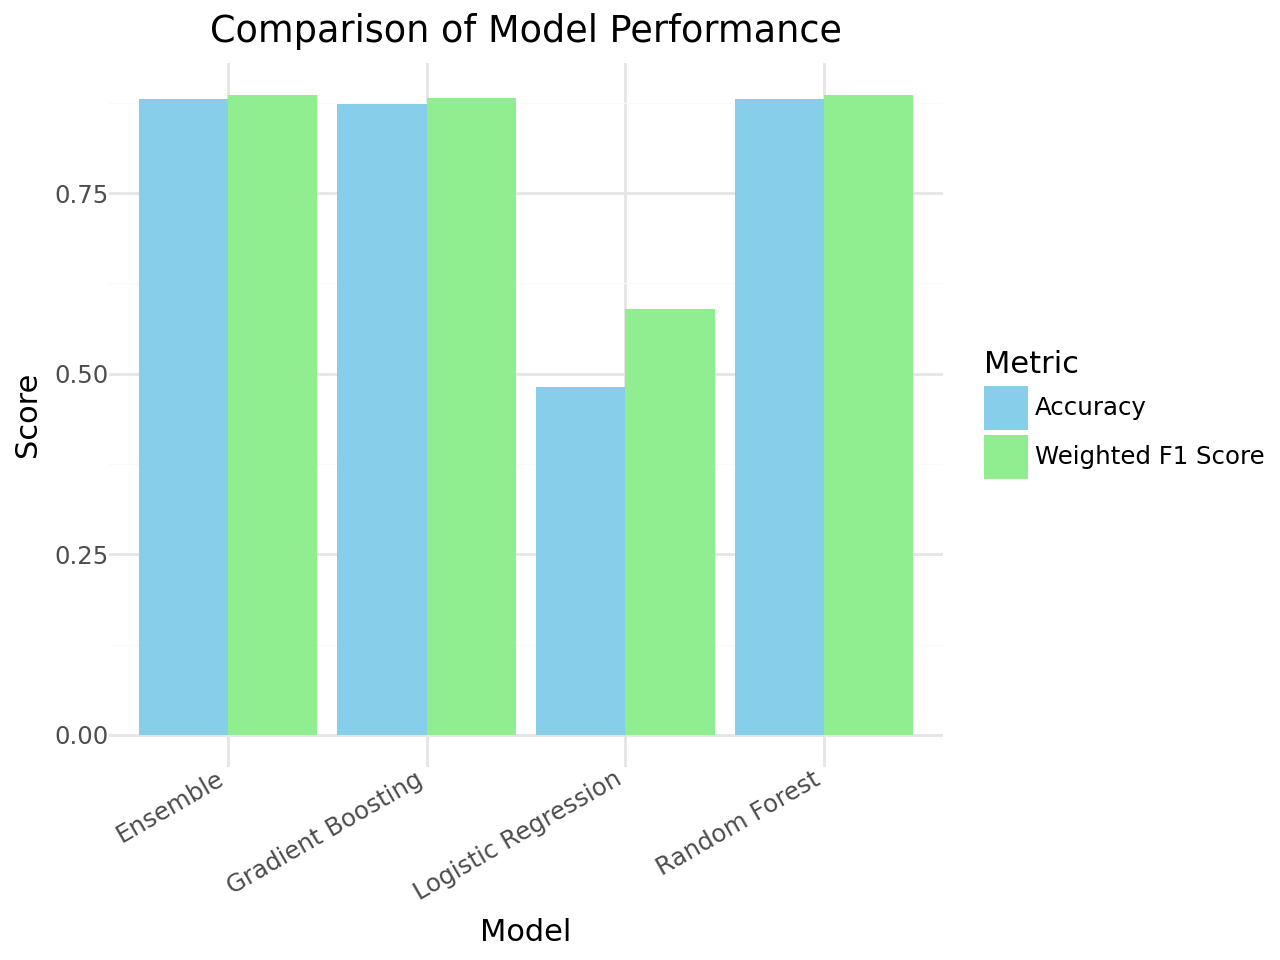

In [21]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'Ensemble'],
    'Accuracy': [rf_acc, gb_acc, logreg_acc, ensemble_acc],
    'Weighted F1 Score': [rf_f1, gb_f1, logreg_f1, ensemble_f1]
})

results_melted = pd.melt(results, id_vars='Model', var_name='Metric', value_name='Score')

(
    ggplot(results_melted, aes(x='Model', y='Score', fill='Metric')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title='Comparison of Model Performance', y='Score', x='Model') +
    scale_fill_manual(values=['skyblue', 'lightgreen']) +
    theme_minimal() +
    theme(axis_text_x=element_text(rotation=30, hjust=1))
)

**Feature Importance Analysis**

2. Feature Importance
- โมเดล GradientBoostingClassifier, สามารถดึงค่าความสำคัญของฟีเจอร์ได้จาก feature_importances_
- สร้างกราฟเพื่อแสดงความสำคัญของแต่ละฟีเจอร์โดยการจัดเรียงจากฟีเจอร์ที่มีความสำคัญสูงสุด

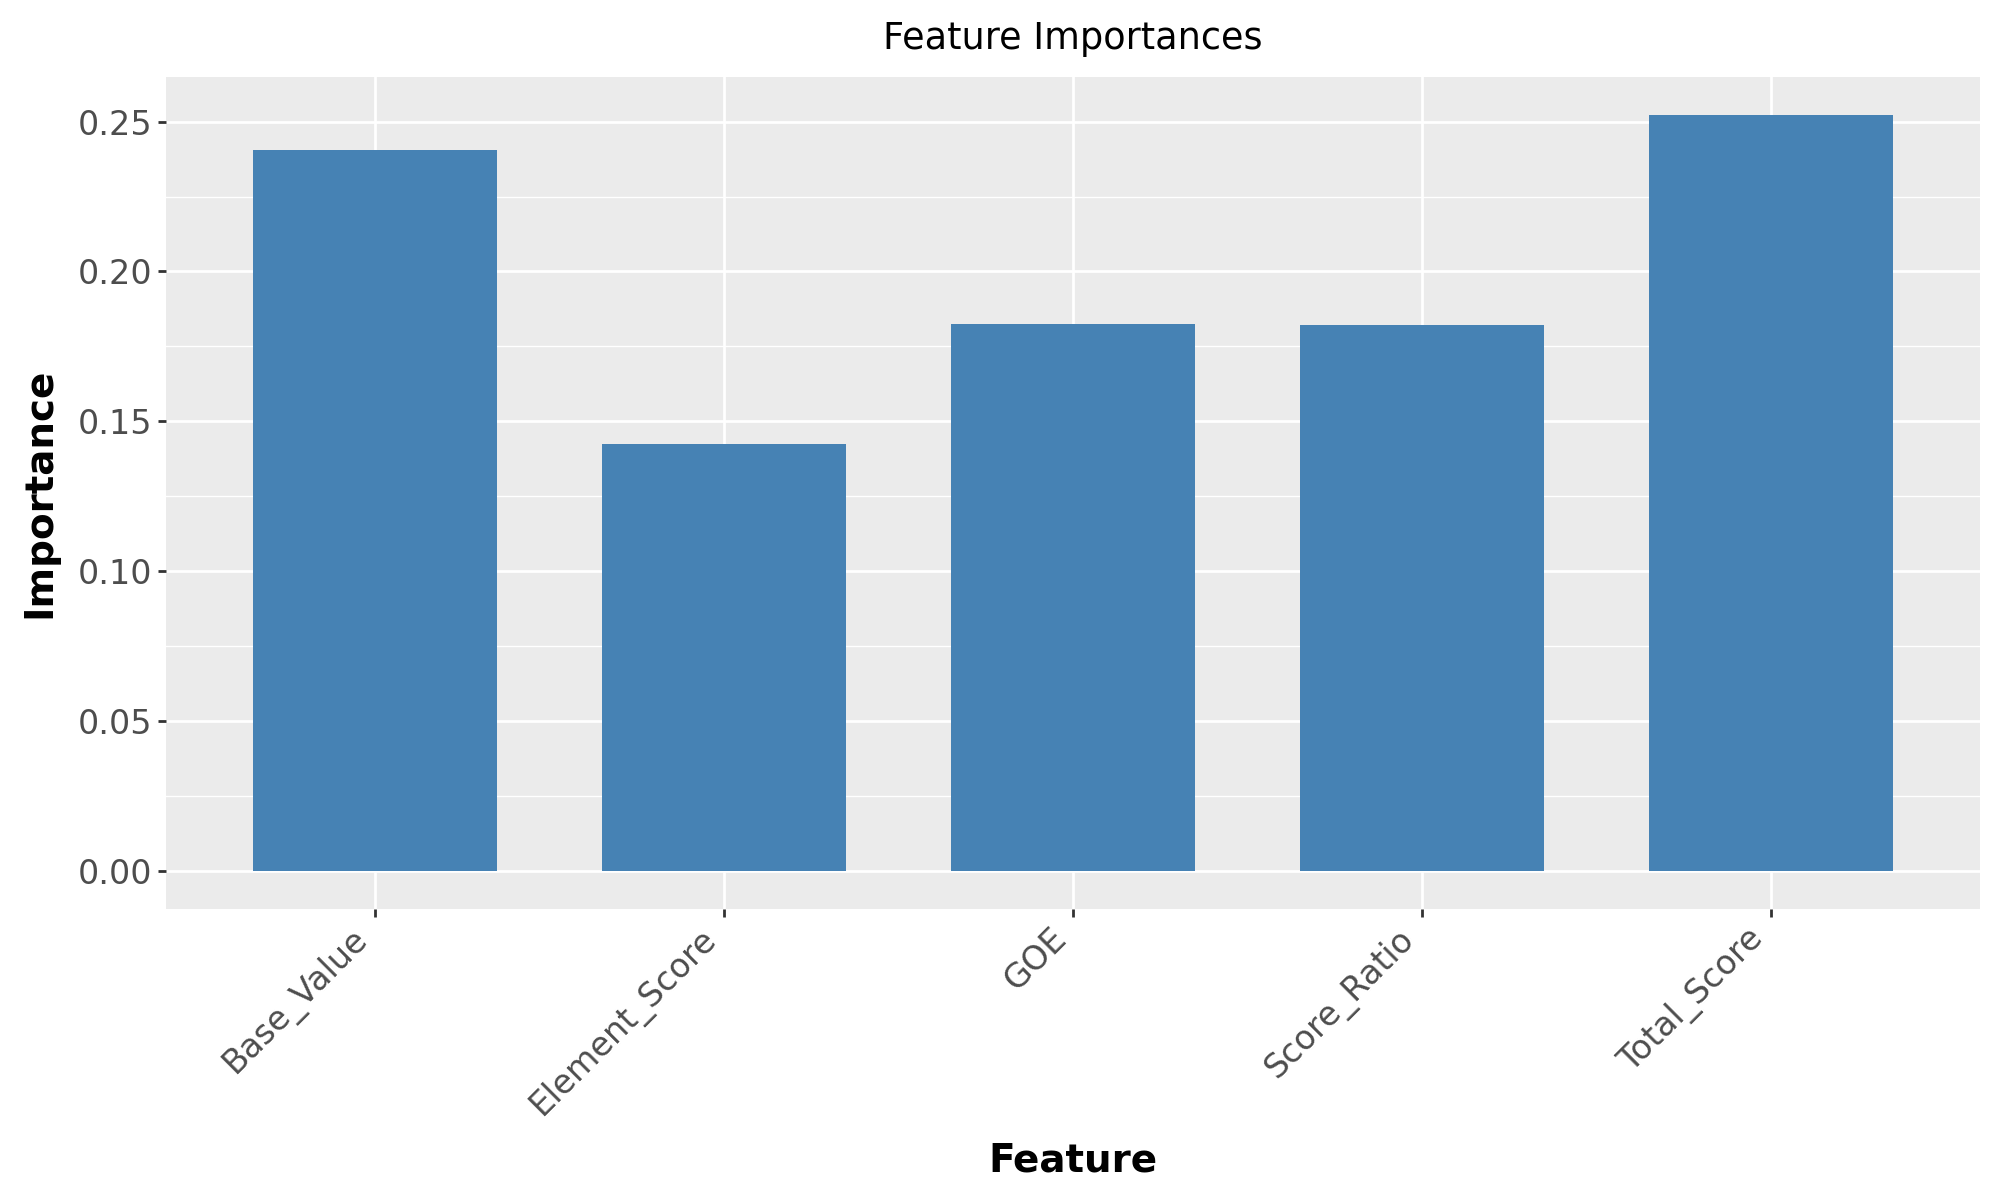

In [22]:
# Get feature names after preprocessing
numeric_features_transformed = preprocessor.transformers_[0][1].get_feature_names_out()
selected_features_mask = selector.get_support()


selected_features = list(numeric_features_transformed) + boolean_features
selected_features = [selected_features[i] for i in range(min(len(selected_features), len(selected_features_mask))) if selected_features_mask[i]]

if hasattr(best_gb.named_steps['classifier'], 'feature_importances_'):
    importances = best_gb.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[::-1]

    importance_df = pd.DataFrame({
        'Feature': [selected_features[i] for i in indices[:len(selected_features)]],
        'Importance': importances[indices[:len(selected_features)]]
    })

    plot = (
        ggplot(importance_df, aes(x='Feature', y='Importance')) +
        geom_bar(stat='identity', fill='steelblue', width=0.7) +
        theme(
            axis_text_x=element_text(rotation=45, ha='right', size=12),
            axis_text_y=element_text(size=12),
            axis_title_x=element_text(size=14, face='bold'),
            axis_title_y=element_text(size=14, face='bold'),
            panel_background=element_text(fill='white'),
            figure_size=(10, 6)
        ) +
        ggtitle("Feature Importances")
    )
plot